In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [3]:
df = pd.read_csv('Employers_data.csv')
df.head()

,Employee_ID,Name,Age,Gender,Department,Job_Title,Experience_Years,Education_Level,Location,Salary
0,1,Merle Ingram,24,Female,Engineering,Engineer,1,Master,Austin,90000
1,2,John Mayes,56,Male,Sales,Executive,33,Master,Seattle,195000
2,3,Carlos Wille,21,Male,Engineering,Intern,1,Bachelor,New York,35000
3,4,Michael Bryant,30,Male,Finance,Analyst,9,Bachelor,New York,75000
4,5,Paula Douglas,25,Female,HR,Analyst,2,Master,Seattle,70000


In [4]:
# Convert strings to category
categorical_columns = ['Name', 'Gender', 'Department', 'Job_Title', 'Education_Level', 'Location']
print(df.dtypes)
for col in categorical_columns:
    if df[col].dtype != 'category':
        df[col] = df[col].astype('category')

print(df.dtypes)

Employee_ID          int64
Name                object
Age                  int64
Gender              object
Department          object
Job_Title           object
Experience_Years     int64
Education_Level     object
Location            object
Salary               int64
dtype: object
Employee_ID            int64
Name                category
Age                    int64
Gender              category
Department          category
Job_Title           category
Experience_Years       int64
Education_Level     category
Location            category
Salary                 int64
dtype: object


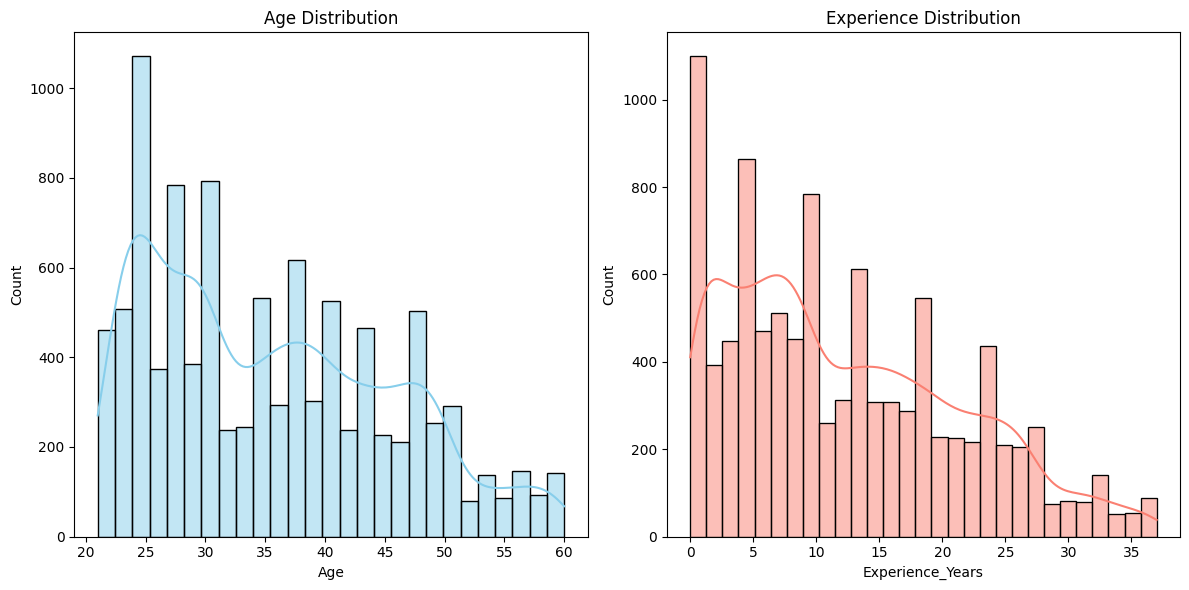

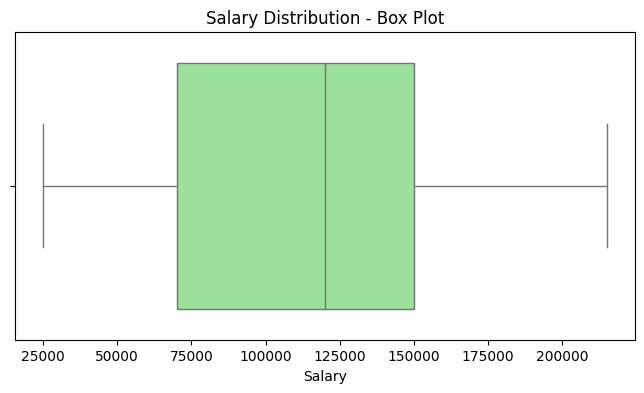

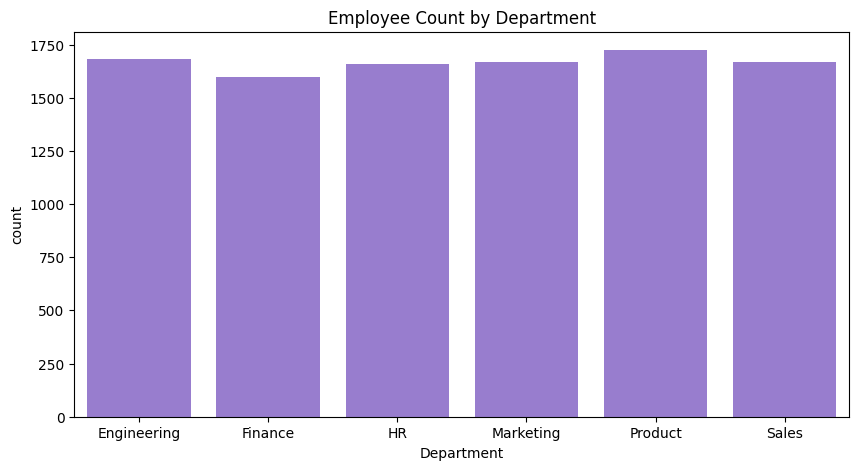

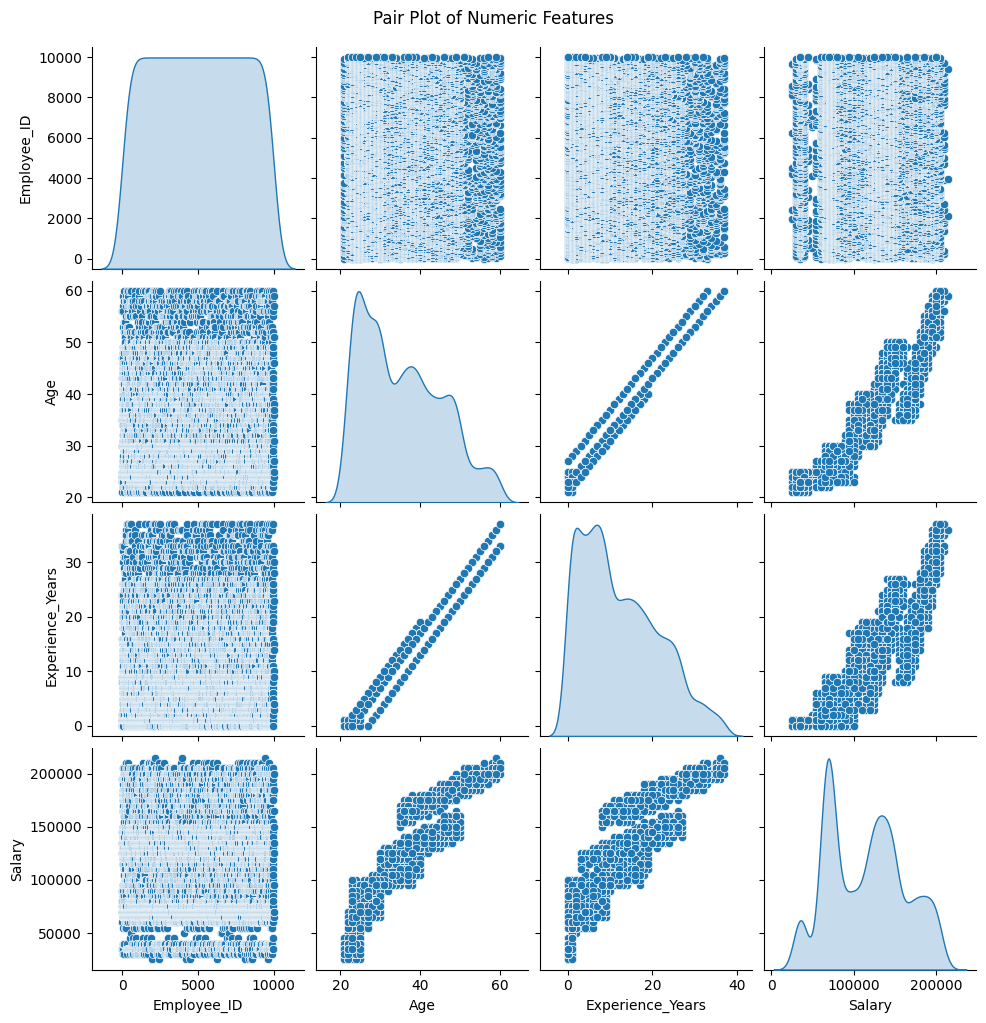

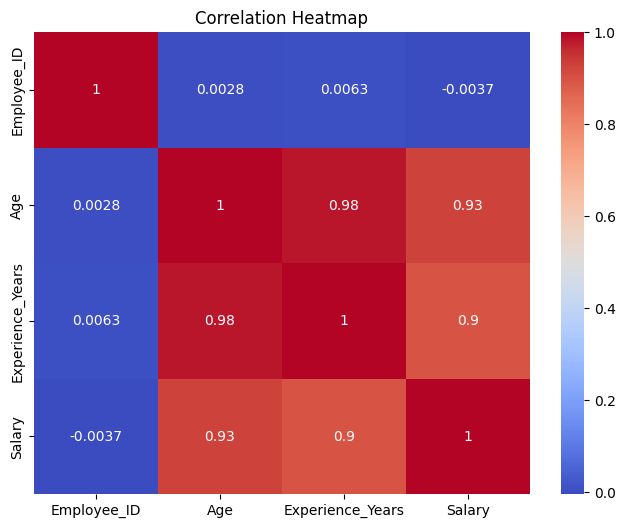

In [6]:
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
sns.histplot(df['Age'], kde=True, color='skyblue')
plt.title('Age Distribution')

plt.subplot(1,2,2)
sns.histplot(df['Experience_Years'], kde=True, color='salmon')
plt.title('Experience Distribution')

plt.tight_layout()
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x=df['Salary'], color='lightgreen')
plt.title('Salary Distribution - Box Plot')
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Department', color='mediumpurple')
plt.title('Employee Count by Department')
plt.show()

numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 2:
    sns.pairplot(numeric_df, diag_kind='kde')
    plt.suptitle('Pair Plot of Numeric Features', y=1.02)
    plt.show()

if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(8, 6))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

Training shape: (6000, 9)
Testing shape: (4000, 9)
R2 Score for Salary Prediction: 0.9044378551409201
MSE for Salary Prediction 204406610.19996992


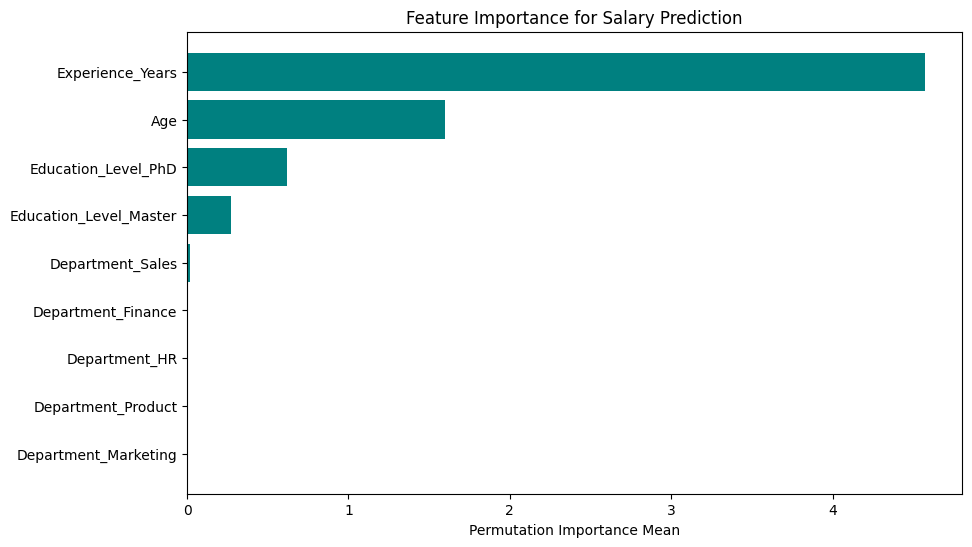

In [14]:
df_pred = df.copy()

features = ['Age', 'Experience_Years', 'Department', 'Education_Level']
target = 'Salary'

df_pred=  pd.get_dummies(df_pred[features + [target]], drop_first=True)

X = df_pred.drop(target, axis=1)
y = df_pred[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

print('Training shape:', X_train.shape)
print('Testing shape:', X_test.shape)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('R2 Score for Salary Prediction:', r2)
print('MSE for Salary Prediction', mse)

perm_importance = permutation_importance(lr_model,X_test, y_test, n_repeats=10, random_state=42)
feature_names = X_test.columns

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx], color='teal')
plt.xlabel('Permutation Importance Mean')
plt.title('Feature Importance for Salary Prediction')
plt.show()

In [84]:
poly = PolynomialFeatures(degree=6, include_bias=False)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

pmodel = LinearRegression()
pmodel.fit(X_train_poly, y_train)

poly_y_pred = pmodel.predict(X_test_poly)

poly_r2 = r2_score(y_test, poly_y_pred)
poly_mse = mean_squared_error(y_test, poly_y_pred)
print('R2 Score for Salary Prediction:', poly_r2)
print('MSE for Salary Prediction', poly_mse)

R2 Score for Salary Prediction: 0.9573937373190216
MSE for Salary Prediction 91134431.32477775


In [85]:
y_train_pred = pmodel.predict(X_train_poly)
y_test_pred = pmodel.predict(X_test_poly)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Train MSE:", mse_train)
print("Test MSE:", mse_test)
print("Train R²:", r2_train)
print("Test R²:", r2_test)

# Train MSE: 141315658.8306254
# Test MSE: 143018463.99242508
# Train R²: 0.9330397797669242
# Test R²: 0.9331374305351636

Train MSE: 86860190.2595815
Test MSE: 91134431.32477775
Train R²: 0.9588426539748193
Test R²: 0.9573937373190216


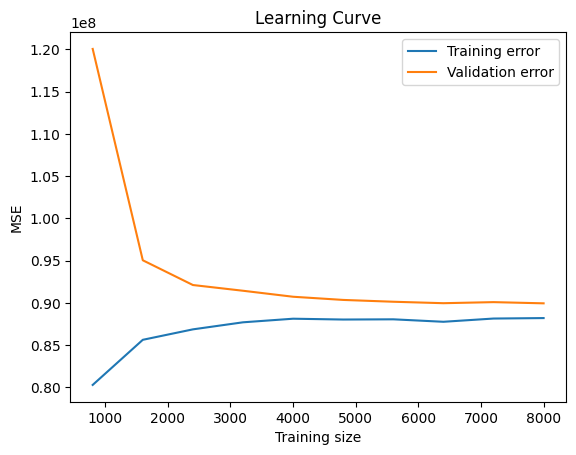

In [ ]:
X_poly = poly.fit_transform(X)

train_sizes, train_scores, test_scores = learning_curve(
    lr_model, X_poly, y, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42, shuffle=True)

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Validation error')
plt.xlabel("Training size")
plt.ylabel("MSE")
plt.legend()
plt.title("Learning Curve")
plt.show()